In [1]:
#Build models using Keras
import tensorflow.keras

from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, model_from_json, Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, SeparableConv2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

#Build models using Keras
import keras
from keras import models
from keras import layers
from keras.layers.core import Permute
import tensorflow as tf
import tensorflow.compat.v1 as tf

# tf.disable_v2_behavior()
tf.enable_eager_execution() 

Using TensorFlow backend.


In [2]:
import timeit

with tf.device('/cpu:0'):
	cpu_a = tf.random.normal([10000, 1000])
	cpu_b = tf.random.normal([1000, 2000])
	print(cpu_a.device, cpu_b.device)

with tf.device('/gpu:0'):
	gpu_a = tf.random.normal([10000, 1000])
	gpu_b = tf.random.normal([1000, 2000])
	print(gpu_a.device, gpu_b.device)

def cpu_run():
	with tf.device('/cpu:0'):
		c = tf.matmul(cpu_a, cpu_b)
	return c

def gpu_run():
	with tf.device('/gpu:0'):
		c = tf.matmul(gpu_a, gpu_b)
	return c


# warm up
cpu_time = timeit.timeit(cpu_run, number=10)
gpu_time = timeit.timeit(gpu_run, number=10)
print('warmup:', cpu_time, gpu_time)


cpu_time = timeit.timeit(cpu_run, number=10)
gpu_time = timeit.timeit(gpu_run, number=10)
print('run time:', cpu_time, gpu_time)

/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup: 0.8483877 0.18008250000000015
run time: 0.8231389 0.0006401000000000323


In [3]:
from PIL import Image
import glob
import cv2
import numpy as np
import pandas as pd
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [4]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from PIL import Image

In [5]:
direct = r'C:/Users/admin/Desktop/SA/SA_L1/'
classes = [clas.name for clas in os.scandir(direct) if clas.is_dir()]

In [6]:
X, y = [], []
for clas in classes:
    path = os.path.join(direct, clas)
    for img in os.listdir(path):
        X.append(cv2.imread(os.path.join(path, img)))
        y.append(int(clas))

In [7]:
print(np.asarray(X).shape)

(220, 224, 224, 3)


In [8]:
X = np.asarray(X)

In [9]:
X = X.reshape(220,3,224,224).transpose(0,2,3,1).astype("uint8")

In [10]:
y = np.array(y)

In [11]:
def one_hot_encode(vec, vals = 3):
    #to one-hot encode the 4- possible labesl
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [12]:
class CifarHelper():
    def __init__(self):
        self.i = 0
        
        self.images = None
        self.labels = None
        
    def set_up_images(self):
        print("Setting up images and labels")
        self.images = np.vstack([X])
        all_len = len(self.images)
        
        self.images = self.images.reshape(220, 3, 224, 224).transpose(0,2,3,1)/255
#         self.images = self.images
        self.labels = one_hot_encode(np.hstack([y]), 3)

In [13]:
#before tensorflow run:
ch = CifarHelper()
ch.set_up_images()

Setting up images and labels


0


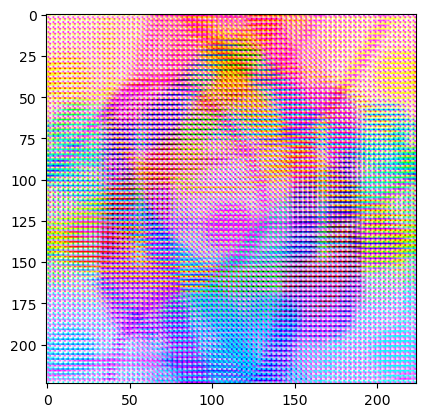

In [14]:
#Check the image and its label
index = 30
plt.imshow(X[index])
print(y[index])

2


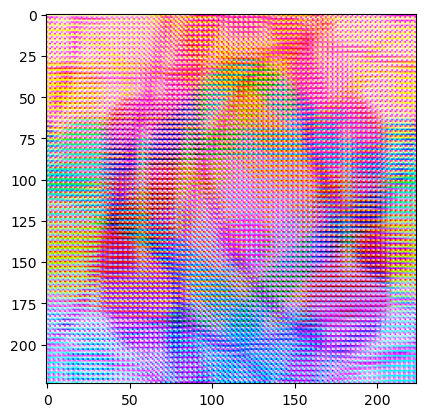

In [15]:
#Check the image and its label
index = 210
plt.imshow(X[index])
print(y[index])

In [16]:
#Encoding data

def vectorize_sequences(sequences, dimension = 1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [17]:
def to_one_hot(y, dimension=3):
    results = np.zeros((len(y), dimension))
    for i, label in enumerate(y):
        results[i, label] = 1.
    return results

In [18]:
one_hot_labels = to_one_hot(y)

In [19]:
def load_and_preprocess_from_path_label(X, y):
#     image = tf.image.decode_jpeg(image, channels=1)
#   image = tf.image.resize(image, [im_height, im_width])
    X = 2*tf.cast(X, dtype=tf.float32) / 255.-1
    y = tf.cast(y, dtype=tf.int32)

    return X, y

In [20]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle = True)

In [23]:
from tensorflow.keras import layers, Model, Sequential, regularizers

In [24]:
def entry_flow(inputs) :

    x = Conv2D(32, 3, strides = 2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64,3,padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    previous_block_activation = x

    for size in [128, 256, 728] :

        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = MaxPooling2D(3, strides=2, padding='same')(x)

        residual = Conv2D(size, 1, strides=2, padding='same')(previous_block_activation)

        x = tensorflow.keras.layers.Add()([x, residual])
        previous_block_activation = x

    return x

In [25]:
def middle_flow(x, num_blocks=8) :

    previous_block_activation = x

    for _ in range(num_blocks) :

        x = Activation('relu')(x)
        x = SeparableConv2D(728, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = Activation('relu')(x)
        x = SeparableConv2D(728, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = Activation('relu')(x)
        x = SeparableConv2D(728, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = tensorflow.keras.layers.Add()([x, previous_block_activation])
        previous_block_activation = x

    return x

In [26]:
def exit_flow(x) :

    previous_block_activation = x

    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)

    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x) 
    x = BatchNormalization()(x)

    x = MaxPooling2D(3, strides=2, padding='same')(x)

    residual = Conv2D(1024, 1, strides=2, padding='same')(previous_block_activation)
    x = tensorflow.keras.layers.Add()([x, residual])

    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)

    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(3, activation='linear')(x)

    return x

In [27]:
inputs = Input(shape=(224,224,3))
outputs = exit_flow(middle_flow(entry_flow(inputs)))
xception = Model(inputs, outputs)

In [23]:
import time
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score 

In [29]:
model = xception

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [31]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [40]:
checkpoint_filepath = 'weights.{epoch:02d}-{val_loss:.2f}.h5'

In [41]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                            monitor = 'val_accuracy',
                                                            mode = 'max',
                                                            save_best_only=True)

In [42]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5), 
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

In [43]:
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data=(X_validation, y_validation), batch_size = 2, callbacks=[model_checkpoint_callback])

Train on 176 samples, validate on 44 samples
Epoch 1/30
176/176 [==============================] - 21s 120ms/sample - loss: 1.0851 - accuracy: 0.3636 - val_loss: 1.0997 - val_accuracy: 0.1818
Epoch 2/30
176/176 [==============================] - 12s 71ms/sample - loss: 0.9771 - accuracy: 0.6193 - val_loss: 1.1054 - val_accuracy: 0.1818
Epoch 3/30
176/176 [==============================] - 12s 71ms/sample - loss: 0.9051 - accuracy: 0.6648 - val_loss: 1.1211 - val_accuracy: 0.1818
Epoch 4/30
176/176 [==============================] - 12s 71ms/sample - loss: 0.8094 - accuracy: 0.7045 - val_loss: 1.1448 - val_accuracy: 0.0909
Epoch 5/30
176/176 [==============================] - 13s 71ms/sample - loss: 0.6956 - accuracy: 0.7500 - val_loss: 1.2140 - val_accuracy: 0.0909
Epoch 6/30
176/176 [==============================] - 13s 72ms/sample - loss: 0.7087 - accuracy: 0.7330 - val_loss: 1.2976 - val_accuracy: 0.1364
Epoch 7/30
176/176 [==============================] - 13s 71ms/sample - loss: 

In [44]:
model.load_weights('weights.14-0.39.h5')

In [47]:
model.save('saved_model/xception_level_1')

INFO:tensorflow:Assets written to: saved_model/xception_level_1\assets


In [24]:
model = tf.keras.models.load_model('saved_model/xception_level_1')

In [25]:
test = model.predict(X_validation, batch_size = 2)

In [26]:
pred = np.argmax(test, axis=1)

In [27]:
pred

array([1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
      dtype=int64)

In [28]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x/e_x.sum()


prob = []
for i in range(len(pred)):
    logit = softmax(test[i])
    prob.append(logit[1])
prob

[0.9769782,
 0.9478618,
 0.7431209,
 0.64871776,
 0.16042191,
 0.4901375,
 0.89570767,
 0.17114943,
 0.91901195,
 0.8808508,
 0.88852227,
 0.64971954,
 0.9491594,
 0.7272267,
 0.9609744,
 0.03888845,
 0.99564964,
 0.020903727,
 0.1444649,
 0.58221984,
 0.99796057,
 0.9974015,
 0.78962517,
 0.118077174,
 0.97420096,
 0.0263195,
 0.67288357,
 0.14925292,
 0.45676944,
 0.87521476,
 0.5980983,
 0.7542693,
 0.7390957,
 0.46034765,
 0.72939885,
 0.93557286,
 0.9496057,
 0.9133816,
 0.99085605,
 0.99259853,
 0.99171466,
 0.7395629,
 0.34628972,
 0.9640302]

In [29]:
y_validation

array([1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1,
       2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
test

array([[-2.3096461 ,  3.3500094 , -0.5579911 ],
       [-1.3228651 ,  2.8737006 , -0.3462007 ],
       [-1.0817655 ,  1.4315293 ,  0.1022772 ],
       [-1.7532485 ,  1.3174921 ,  0.6145283 ],
       [ 1.0731931 , -0.36077186, -0.32322395],
       [-1.4548215 ,  0.7076511 ,  0.6299096 ],
       [-1.1711594 ,  2.0206642 , -0.56509554],
       [-2.5552104 ,  0.74671155,  2.3165839 ],
       [-0.31562772,  2.4047697 , -1.3994502 ],
       [-1.636271  ,  2.0336435 , -0.17556502],
       [-0.8542003 ,  1.9945235 , -0.70042306],
       [ 0.27751452,  1.0903541 , -1.2579708 ],
       [-2.4653385 ,  2.8597684 , -0.16238934],
       [ 0.40483284,  1.5228089 , -1.5107036 ],
       [-2.3119187 ,  2.9237814 , -0.4204472 ],
       [-1.7957782 , -0.9793278 ,  2.2100196 ],
       [-2.0437715 ,  4.355803  , -1.556044  ],
       [ 1.1589884 , -2.3432422 ,  0.27042073],
       [-1.4380592 , -0.18005607,  1.5494511 ],
       [ 0.2677857 ,  0.8447597 , -1.0133374 ],
       [-3.1118405 ,  4.9117775 , -1.455

In [ ]:
print(classification_report(y_validation, pred))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\envs\Virtual Environment\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_12328\3760519476.py", line 1, in <module>
    print(classification_report(y_validation, pred))
NameError: name 'classification_report' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\envs\Virtual Environment\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\envs\Virtual Environment\lib\site-packages\IPython\core\ultratb.py", line 1101, in 

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_validation, pred)

array([[ 5,  3,  0],
       [ 0, 30,  2],
       [ 0,  1,  3]], dtype=int64)

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay

In [34]:
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [35]:
y_val = label_binarize(y_validation, classes=[0, 1, 2])

In [36]:
fpr = [0]*3
tpr = [0]*3
thresholds = [0]*3
auc_score = [0]*3
n_classes = 3

In [37]:
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_val[:, i], 
                                             test[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
auc_score

[1.0, 0.8723958333333333, 0.9624999999999999]

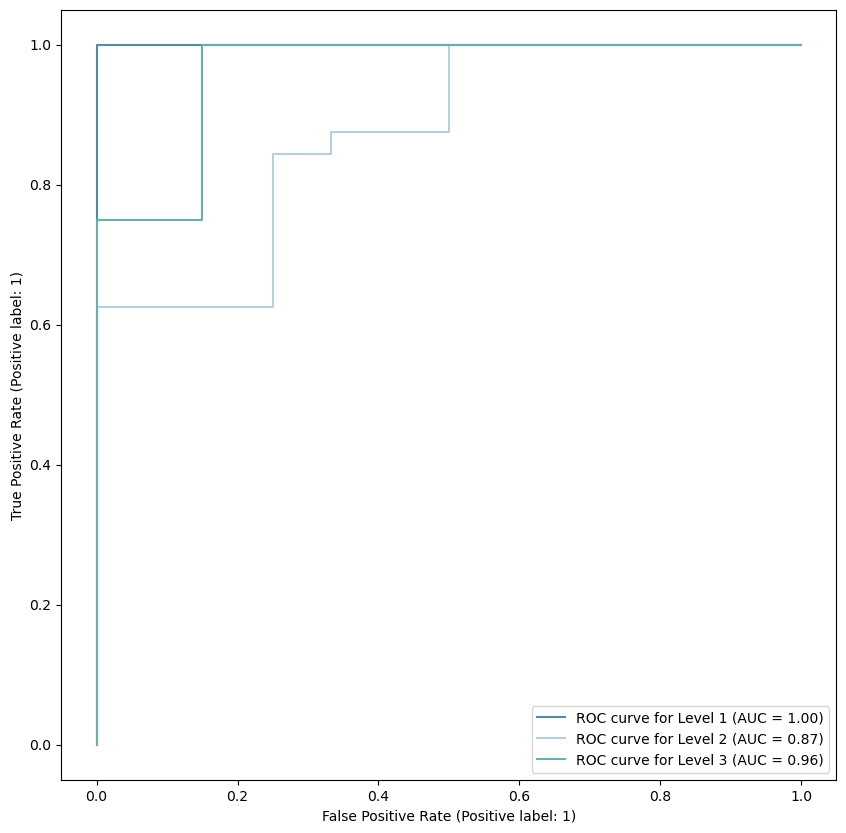

In [56]:
fig, ax = plt.subplots(figsize = (10, 10))
target_names = ["Level 1", "Level 2", "Level 3"]
class_id = [0, 1, 2]
colors = cycle(["#508ca4", "#b7d1da", "#68b0ab"])

for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_val[:, class_id],
    test[:, class_id],
    name=f"ROC curve for {target_names[class_id]}",
    color = color, ax=ax)
    
plt.savefig('Level_1.png', dpi=300)